# Bank Account Assessment Project Part 3
Logistic Regression details and characteristics exploration

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# command exclusive to Jupyter notebooks
%matplotlib inline   
import matplotlib as mpl
import seaborn as sns
plt.rcParams["figure.dpi"] = 400
df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [7]:
# list all the columns from the df 
features_response = df.columns.tolist()
print(features_response[:5])
print(features_response[-5:])

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']
['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']


In [8]:
# remove itens that were incorrectly inputed in the df 
# such as PAY_2 to PAY_6, gender (requested by client), etc
items_to_remove = ["ID", "SEX", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "EDUCATION_CAT",
                   "graduate school", "high school", "none", "others", "university"]

In [9]:
# using list comprehension to create list with the import characteristics only
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [10]:
# create linear correlation matrix
# when the correlation is negative, it means that there is an inverse linear relation
corr = df[features_response].corr()
corr.iloc[:5, :5]

LIMIT_BAL  EDUCATION  MARRIAGE       AGE     PAY_1
LIMIT_BAL   1.000000  -0.232688 -0.111873  0.149157 -0.273396
EDUCATION  -0.232688   1.000000 -0.137097  0.179035  0.112653
MARRIAGE   -0.111873  -0.137097  1.000000 -0.412828  0.019759
AGE         0.149157   0.179035 -0.412828  1.000000 -0.044277
PAY_1      -0.273396   0.112653  0.019759 -0.044277  1.000000

<Axes: >

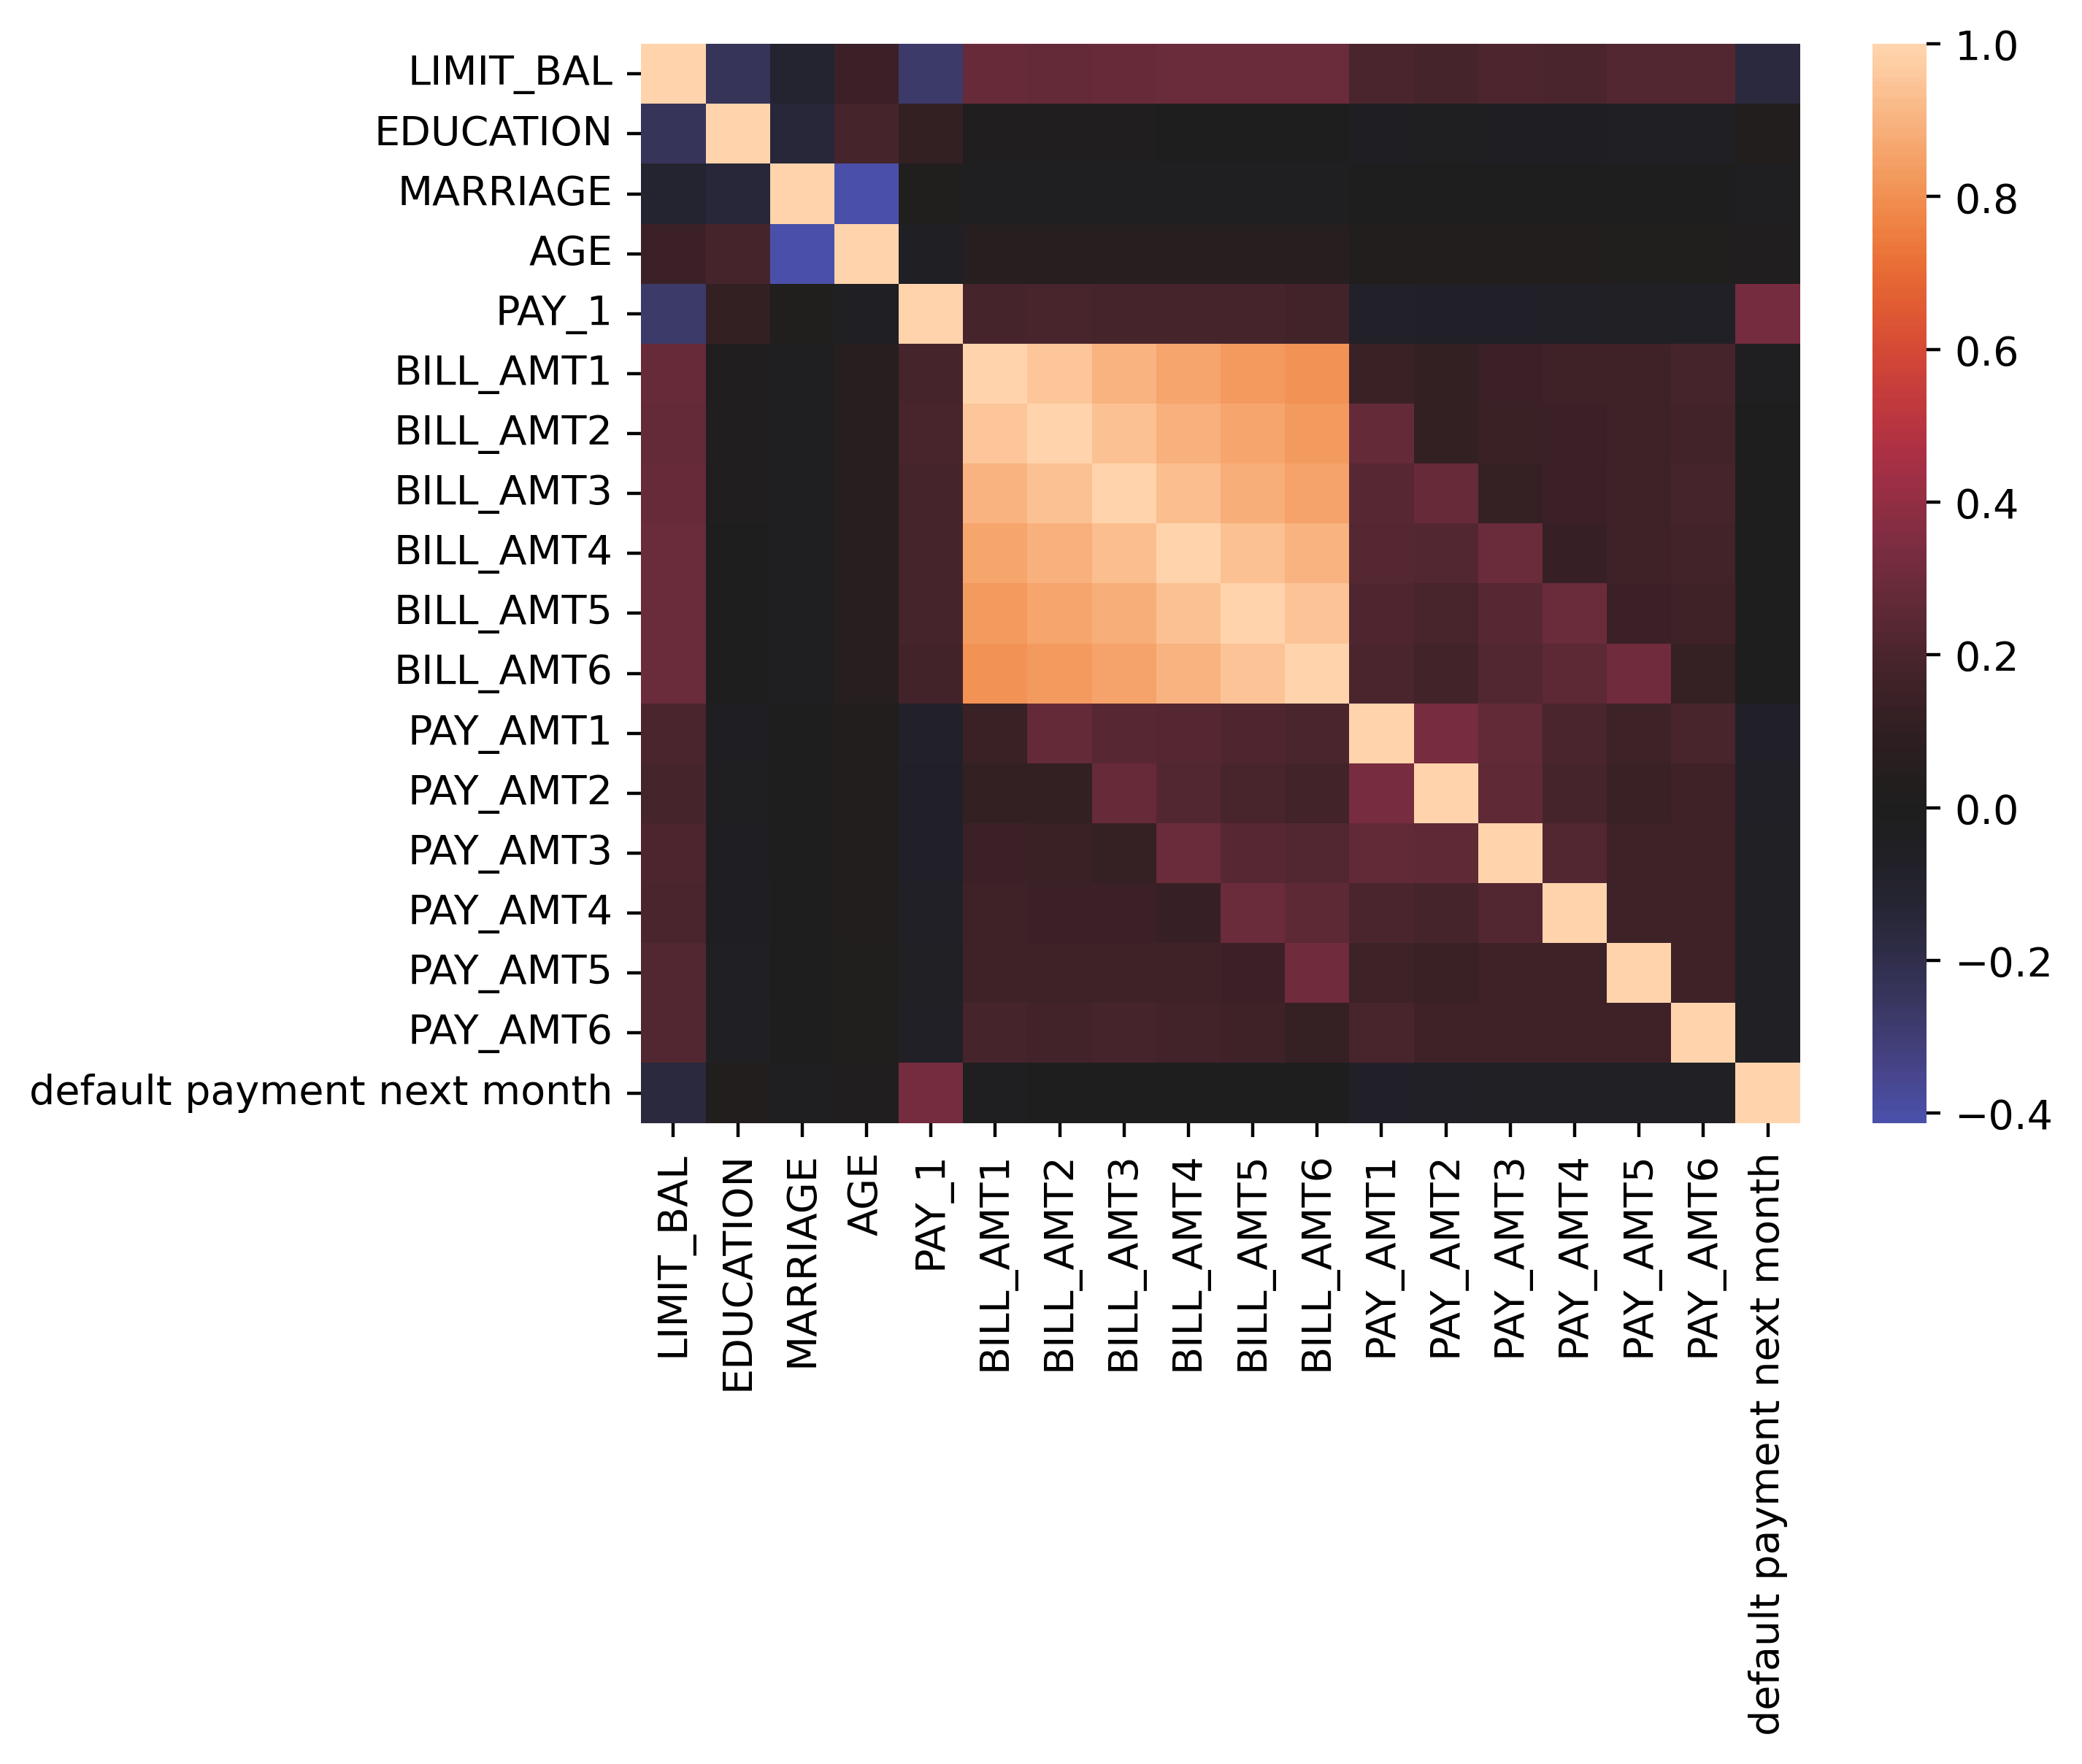

In [11]:
# create correlation plot with seaborn
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           center=0)

## F test

In [12]:
# separate data
x = df[features_response].iloc[:, :-1].values
y = df[features_response].iloc[:, -1].values
print(x.shape, y.shape)

(26664, 17) (26664,)


In [13]:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(x, y)

In [14]:
# F ANOVA test results
# as F statistic value increases when the p-value becomes smaller
f_test_df = pd.DataFrame({"Feature": features_response[:-1],
                         "F statistic": f_stat,
                         "p value": f_p_value})
f_test_df.sort_values("p value")

Feature  F statistic        p value
4       PAY_1  3156.672300   0.000000e+00
0   LIMIT_BAL   651.324071  5.838366e-142
11   PAY_AMT1   140.612679   2.358354e-32
12   PAY_AMT2   101.408321   8.256124e-24
13   PAY_AMT3    90.023873   2.542641e-21
15   PAY_AMT5    85.843295   2.090120e-20
16   PAY_AMT6    80.420784   3.219565e-19
14   PAY_AMT4    79.640021   4.774112e-19
1   EDUCATION    32.637768   1.122175e-08
2    MARRIAGE    18.078027   2.127555e-05
5   BILL_AMT1    11.218406   8.110226e-04
7   BILL_AMT3     5.722938   1.675157e-02
6   BILL_AMT2     5.668454   1.727965e-02
3         AGE     5.479140   1.925206e-02
8   BILL_AMT4     3.434740   6.384965e-02
9   BILL_AMT5     1.216082   2.701409e-01
10  BILL_AMT6     1.049561   3.056176e-01

In [15]:
# selecting 20% of the characteristics with greater F statistic
from sklearn.feature_selection import SelectPercentile

selector = SelectPercentile(f_classif, percentile=20)
selector.fit(x, y)

SelectPercentile(percentile=20)

In [16]:
best_feature_index = selector.get_support()
best_feature_index

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [17]:
# remove variable of interest "default payment next month"
features = features_response[:-1]  
print(features)

best_features = [features[counter] for counter in range(len(features)) if best_feature_index[counter]]
best_features

['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [18]:
overall_default_rate = df["default payment next month"].mean()
overall_default_rate

0.2217971797179718

In [19]:
group_by_pay_mean_y = df.groupby("PAY_1").agg({"default payment next month":np.mean})
group_by_pay_mean_y

default payment next month
PAY_1                            
-2                       0.131664
-1                       0.170002
 0                       0.128295
 1                       0.336400
 2                       0.694701
 3                       0.773973
 4                       0.682540
 5                       0.434783
 6                       0.545455
 7                       0.777778
 8                       0.588235

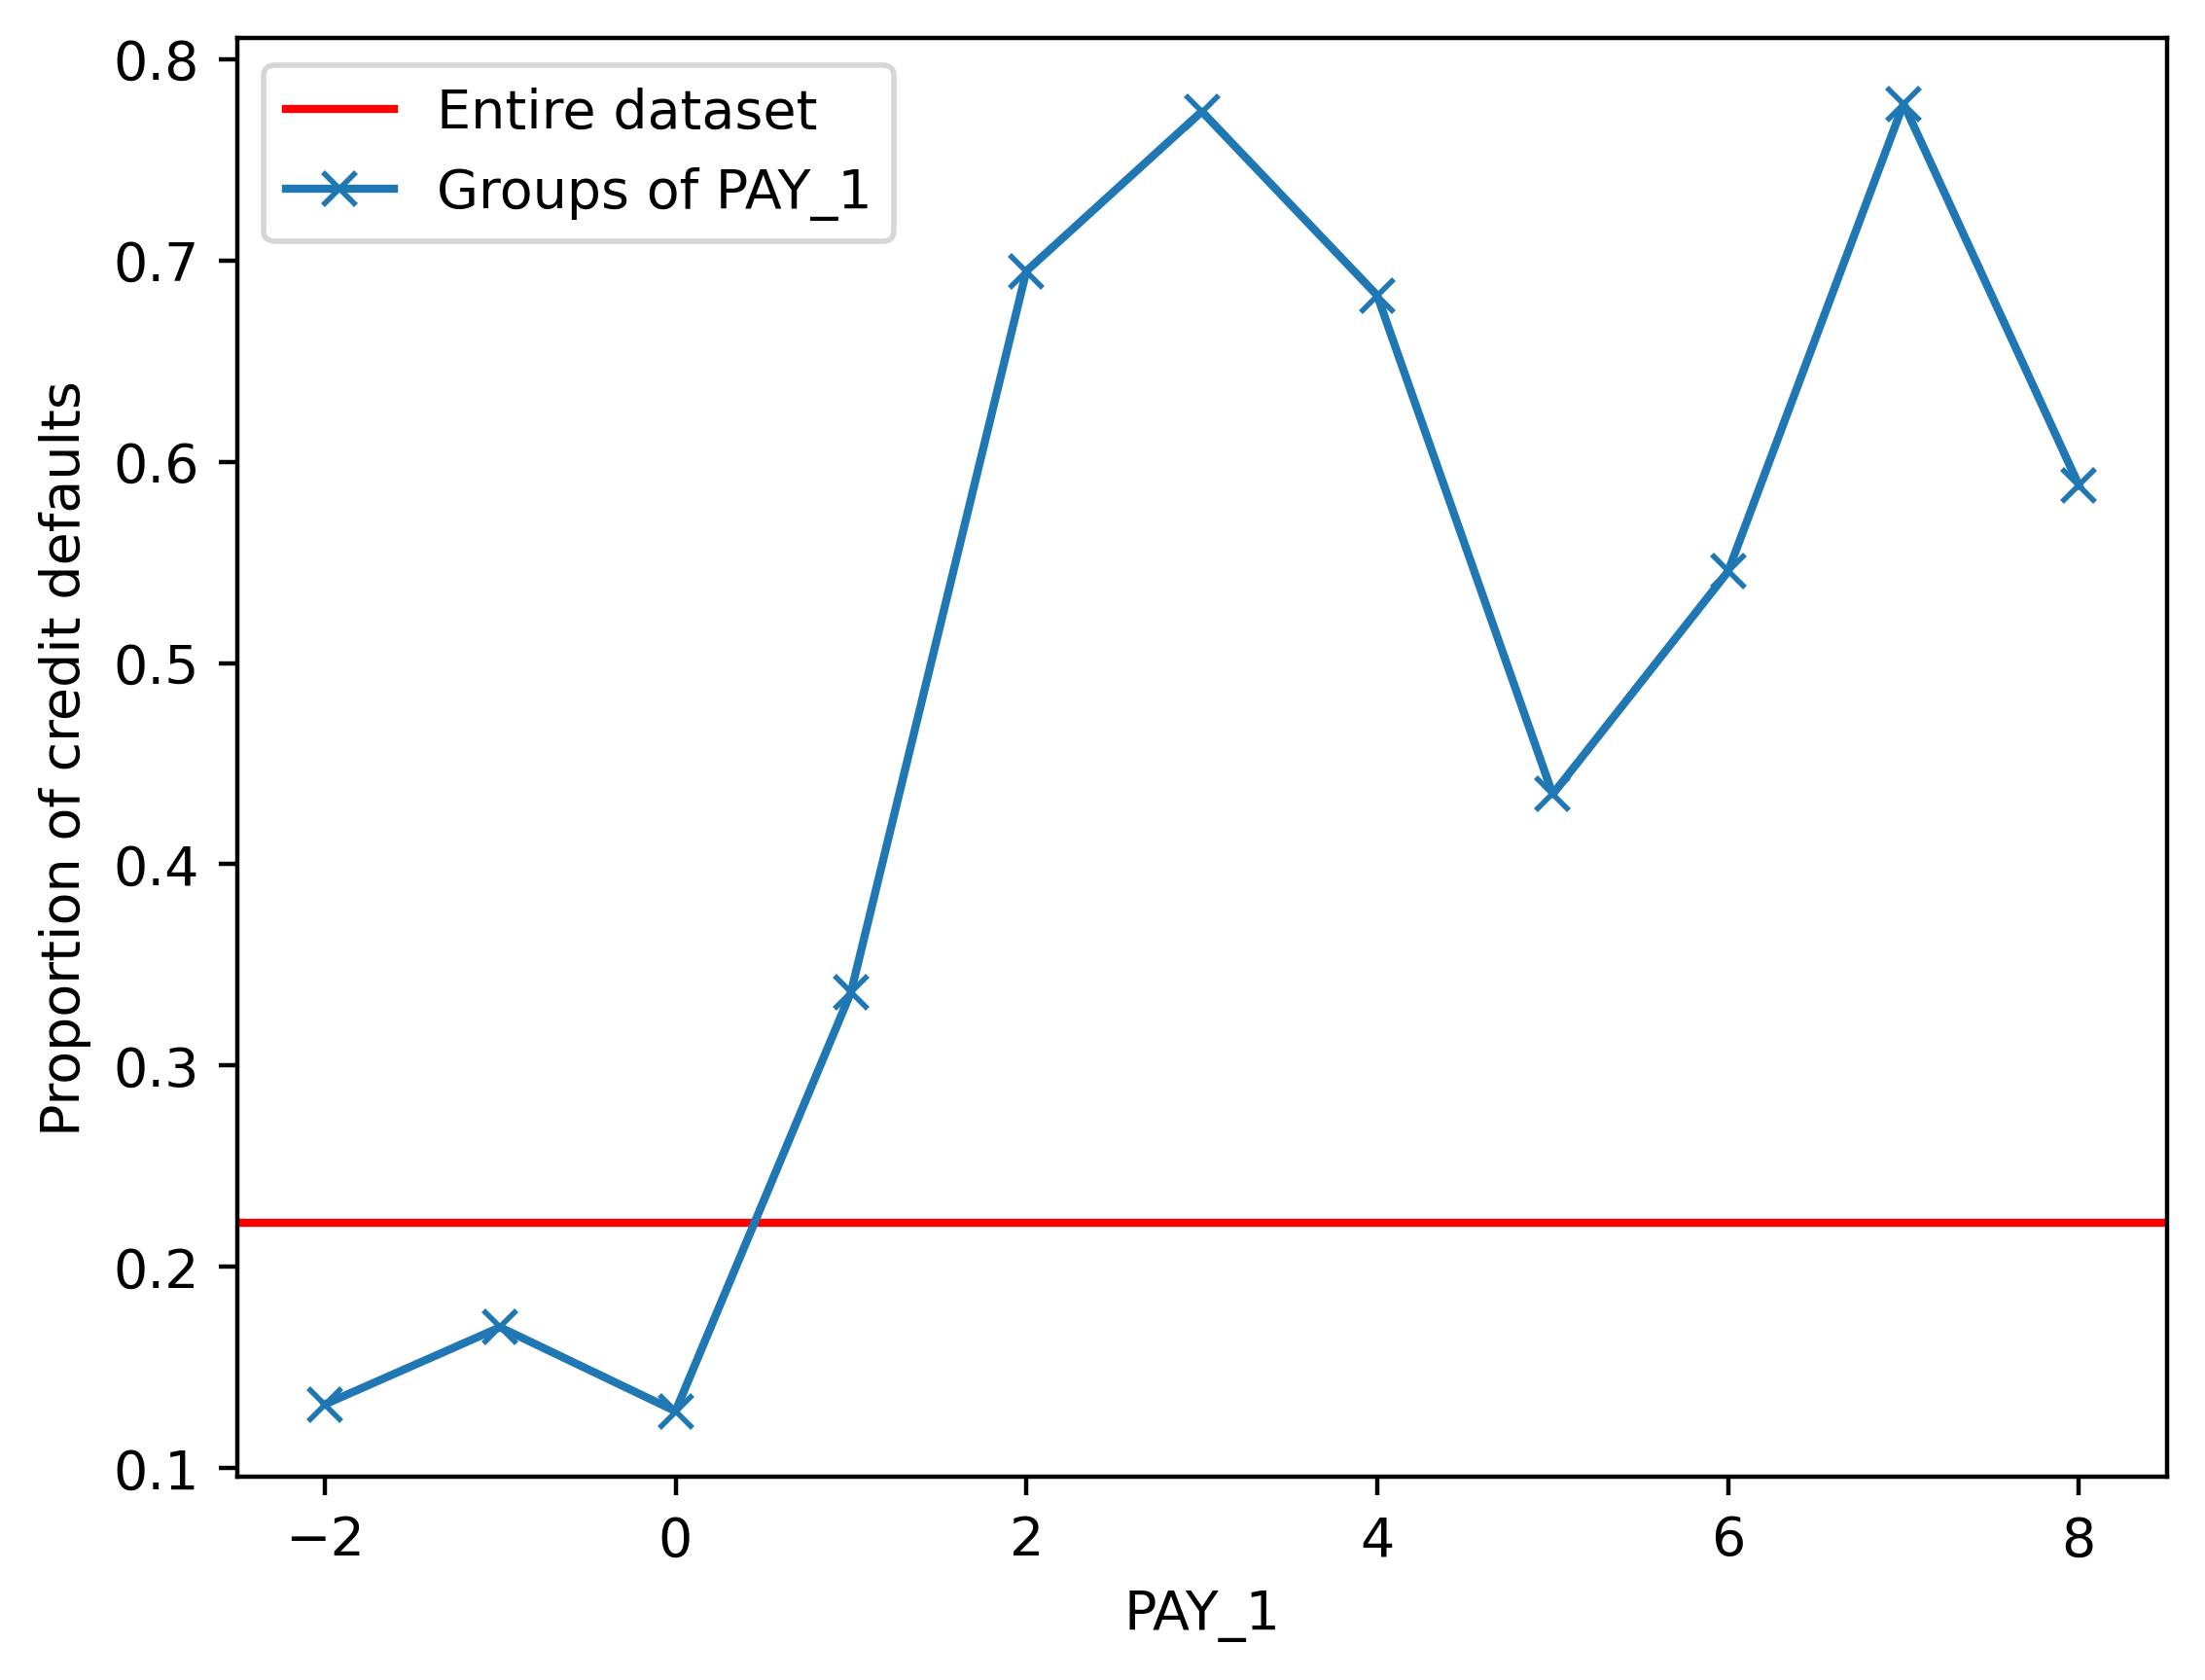

In [20]:
axes = plt.axes()
axes.axhline(overall_default_rate, color="red")
group_by_pay_mean_y.plot(marker="x", legend="False", ax=axes)
axes.set_ylabel("Proportion of credit defaults")
axes.legend(["Entire dataset", "Groups of PAY_1"])

Text(0.5, 1.0, 'Credit limtis by response variable')

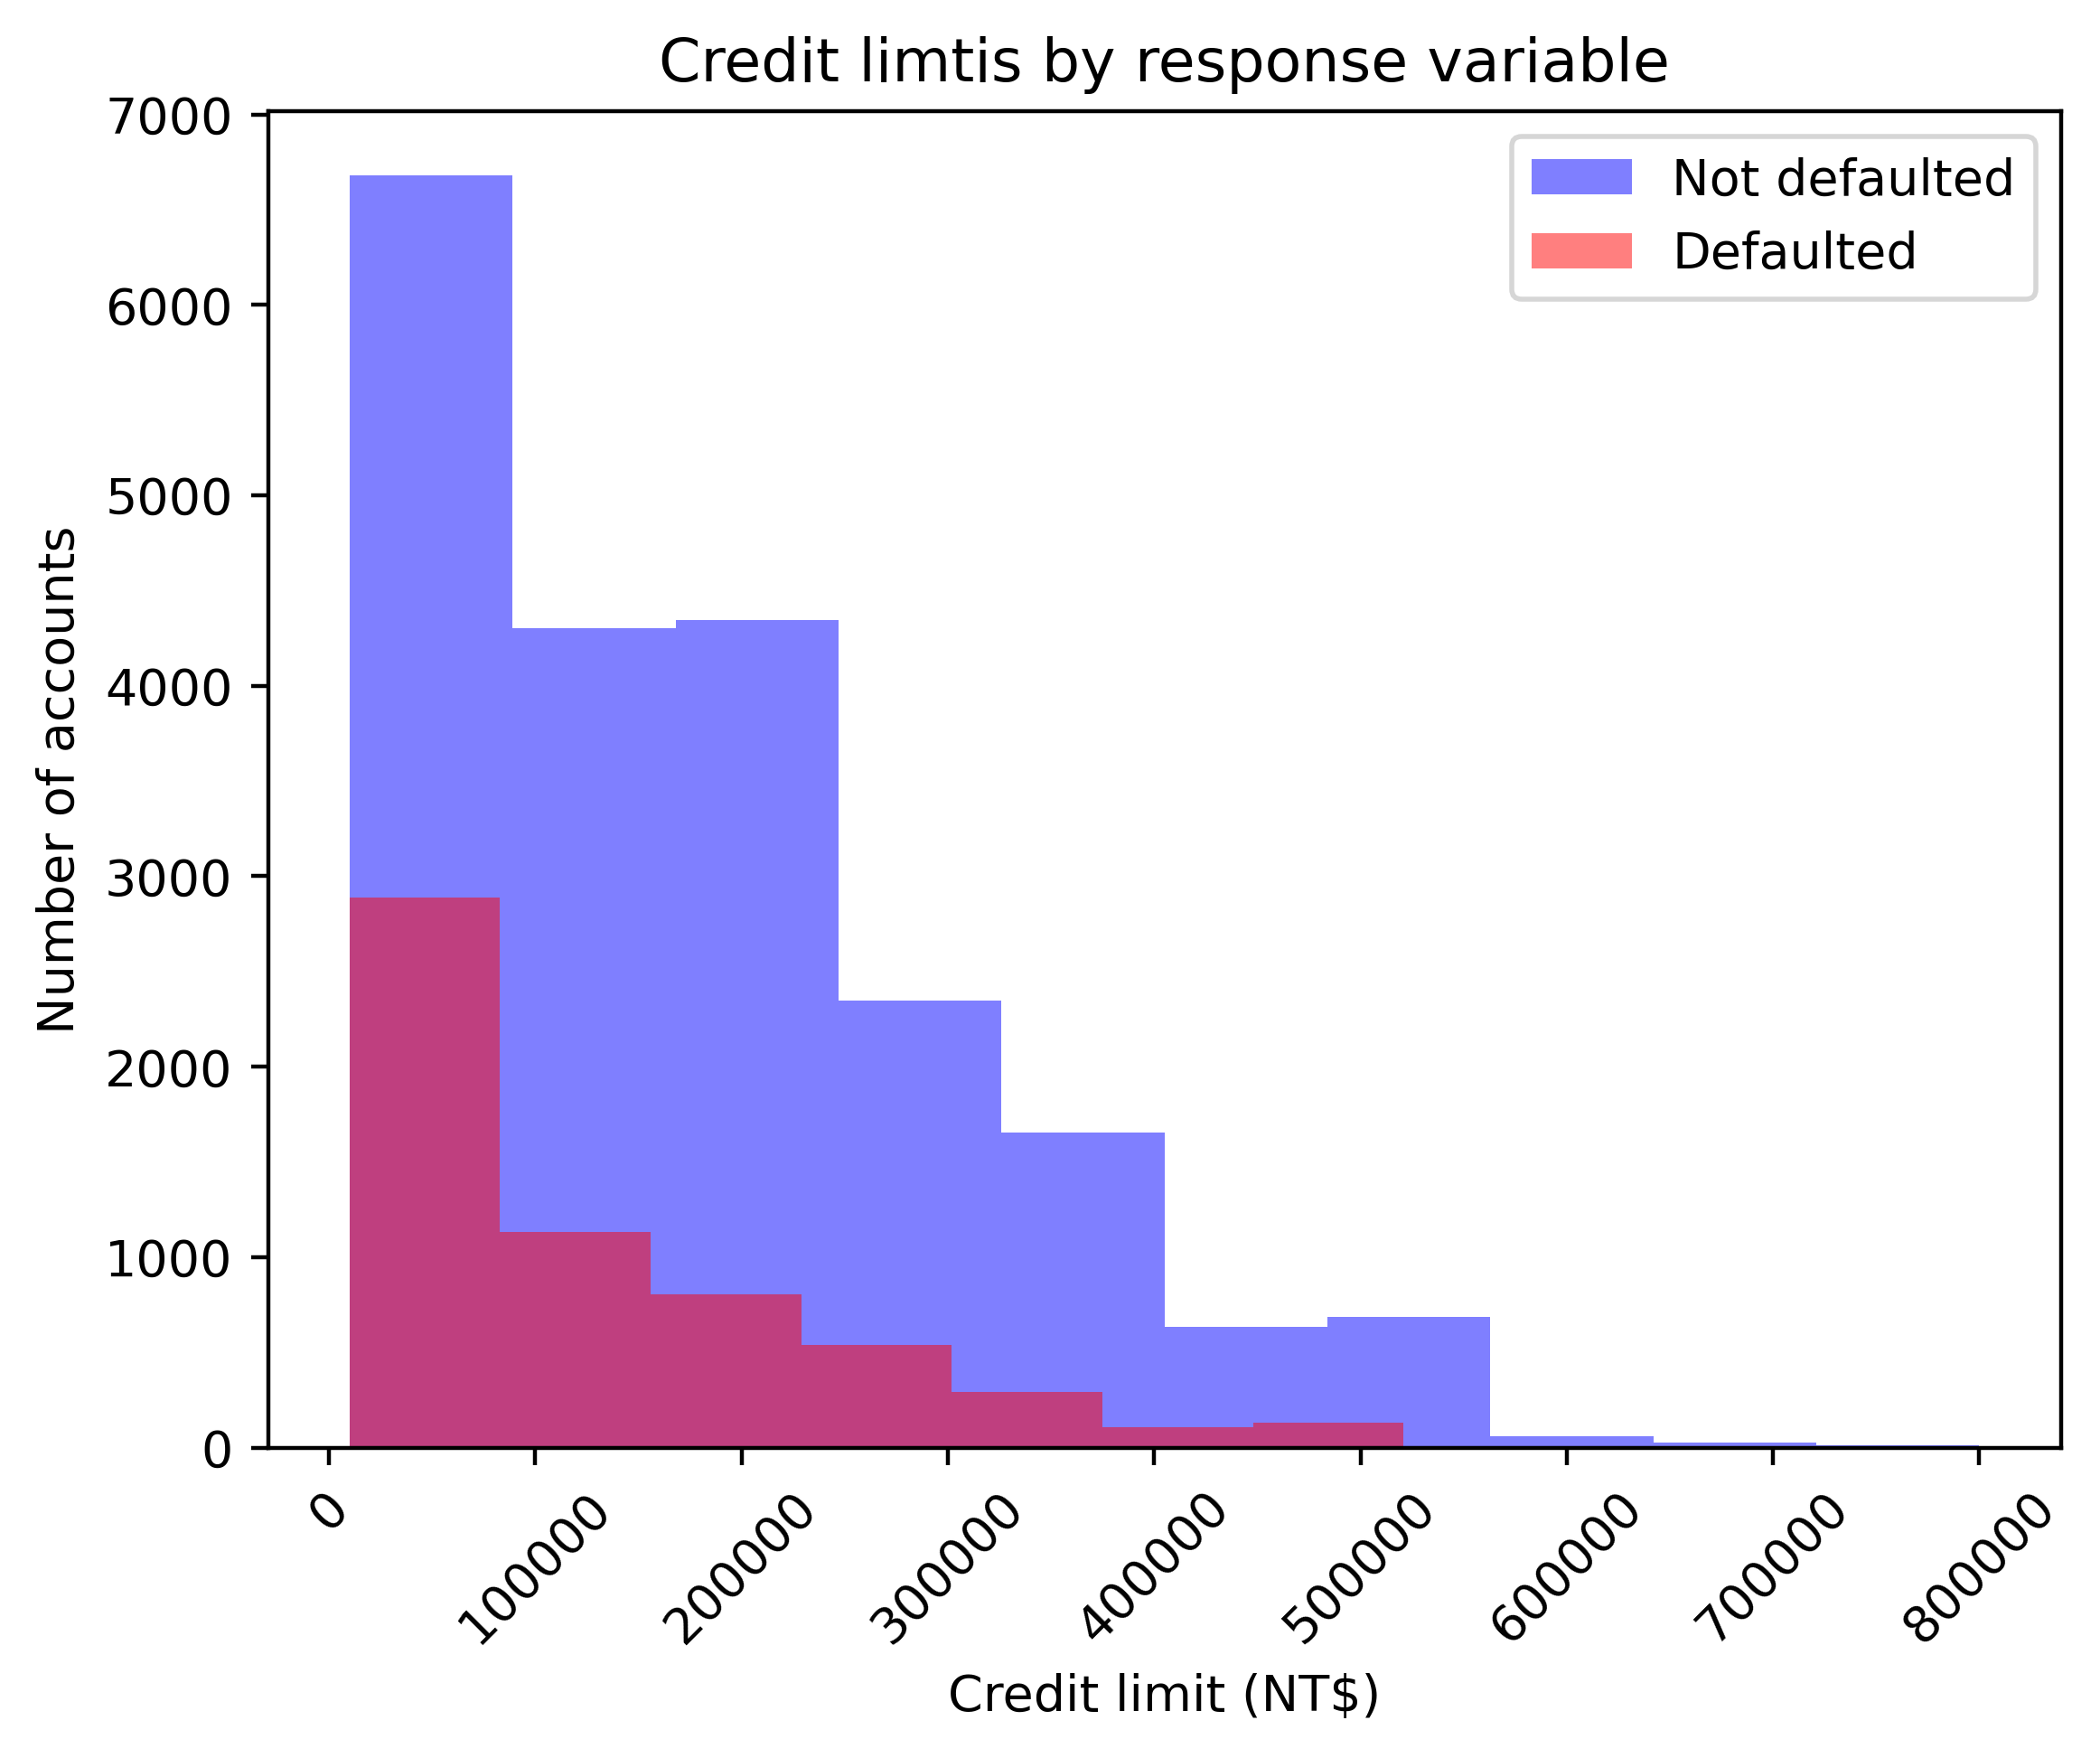

In [21]:
# using LIMIT_BAL
pos_mask = y == 1
neg_mask = y == 0

axes = plt.axes()
axes.hist(df.loc[neg_mask, "LIMIT_BAL"], alpha=0.5, color="blue")
axes.hist(df.loc[pos_mask, "LIMIT_BAL"], alpha=0.5, color="red")
axes.tick_params(axis="x", labelrotation=45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Number of accounts")
axes.legend(["Not defaulted", "Defaulted"])
axes.set_title("Credit limtis by response variable")

In [23]:
print(df["LIMIT_BAL"].max())

bin_edges = list(range(0, 850000, 50000))
bin_edges[-1]

800000


800000

C:\Users\User\AppData\Local\Temp\ipykernel_18444\3951929079.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000, 2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

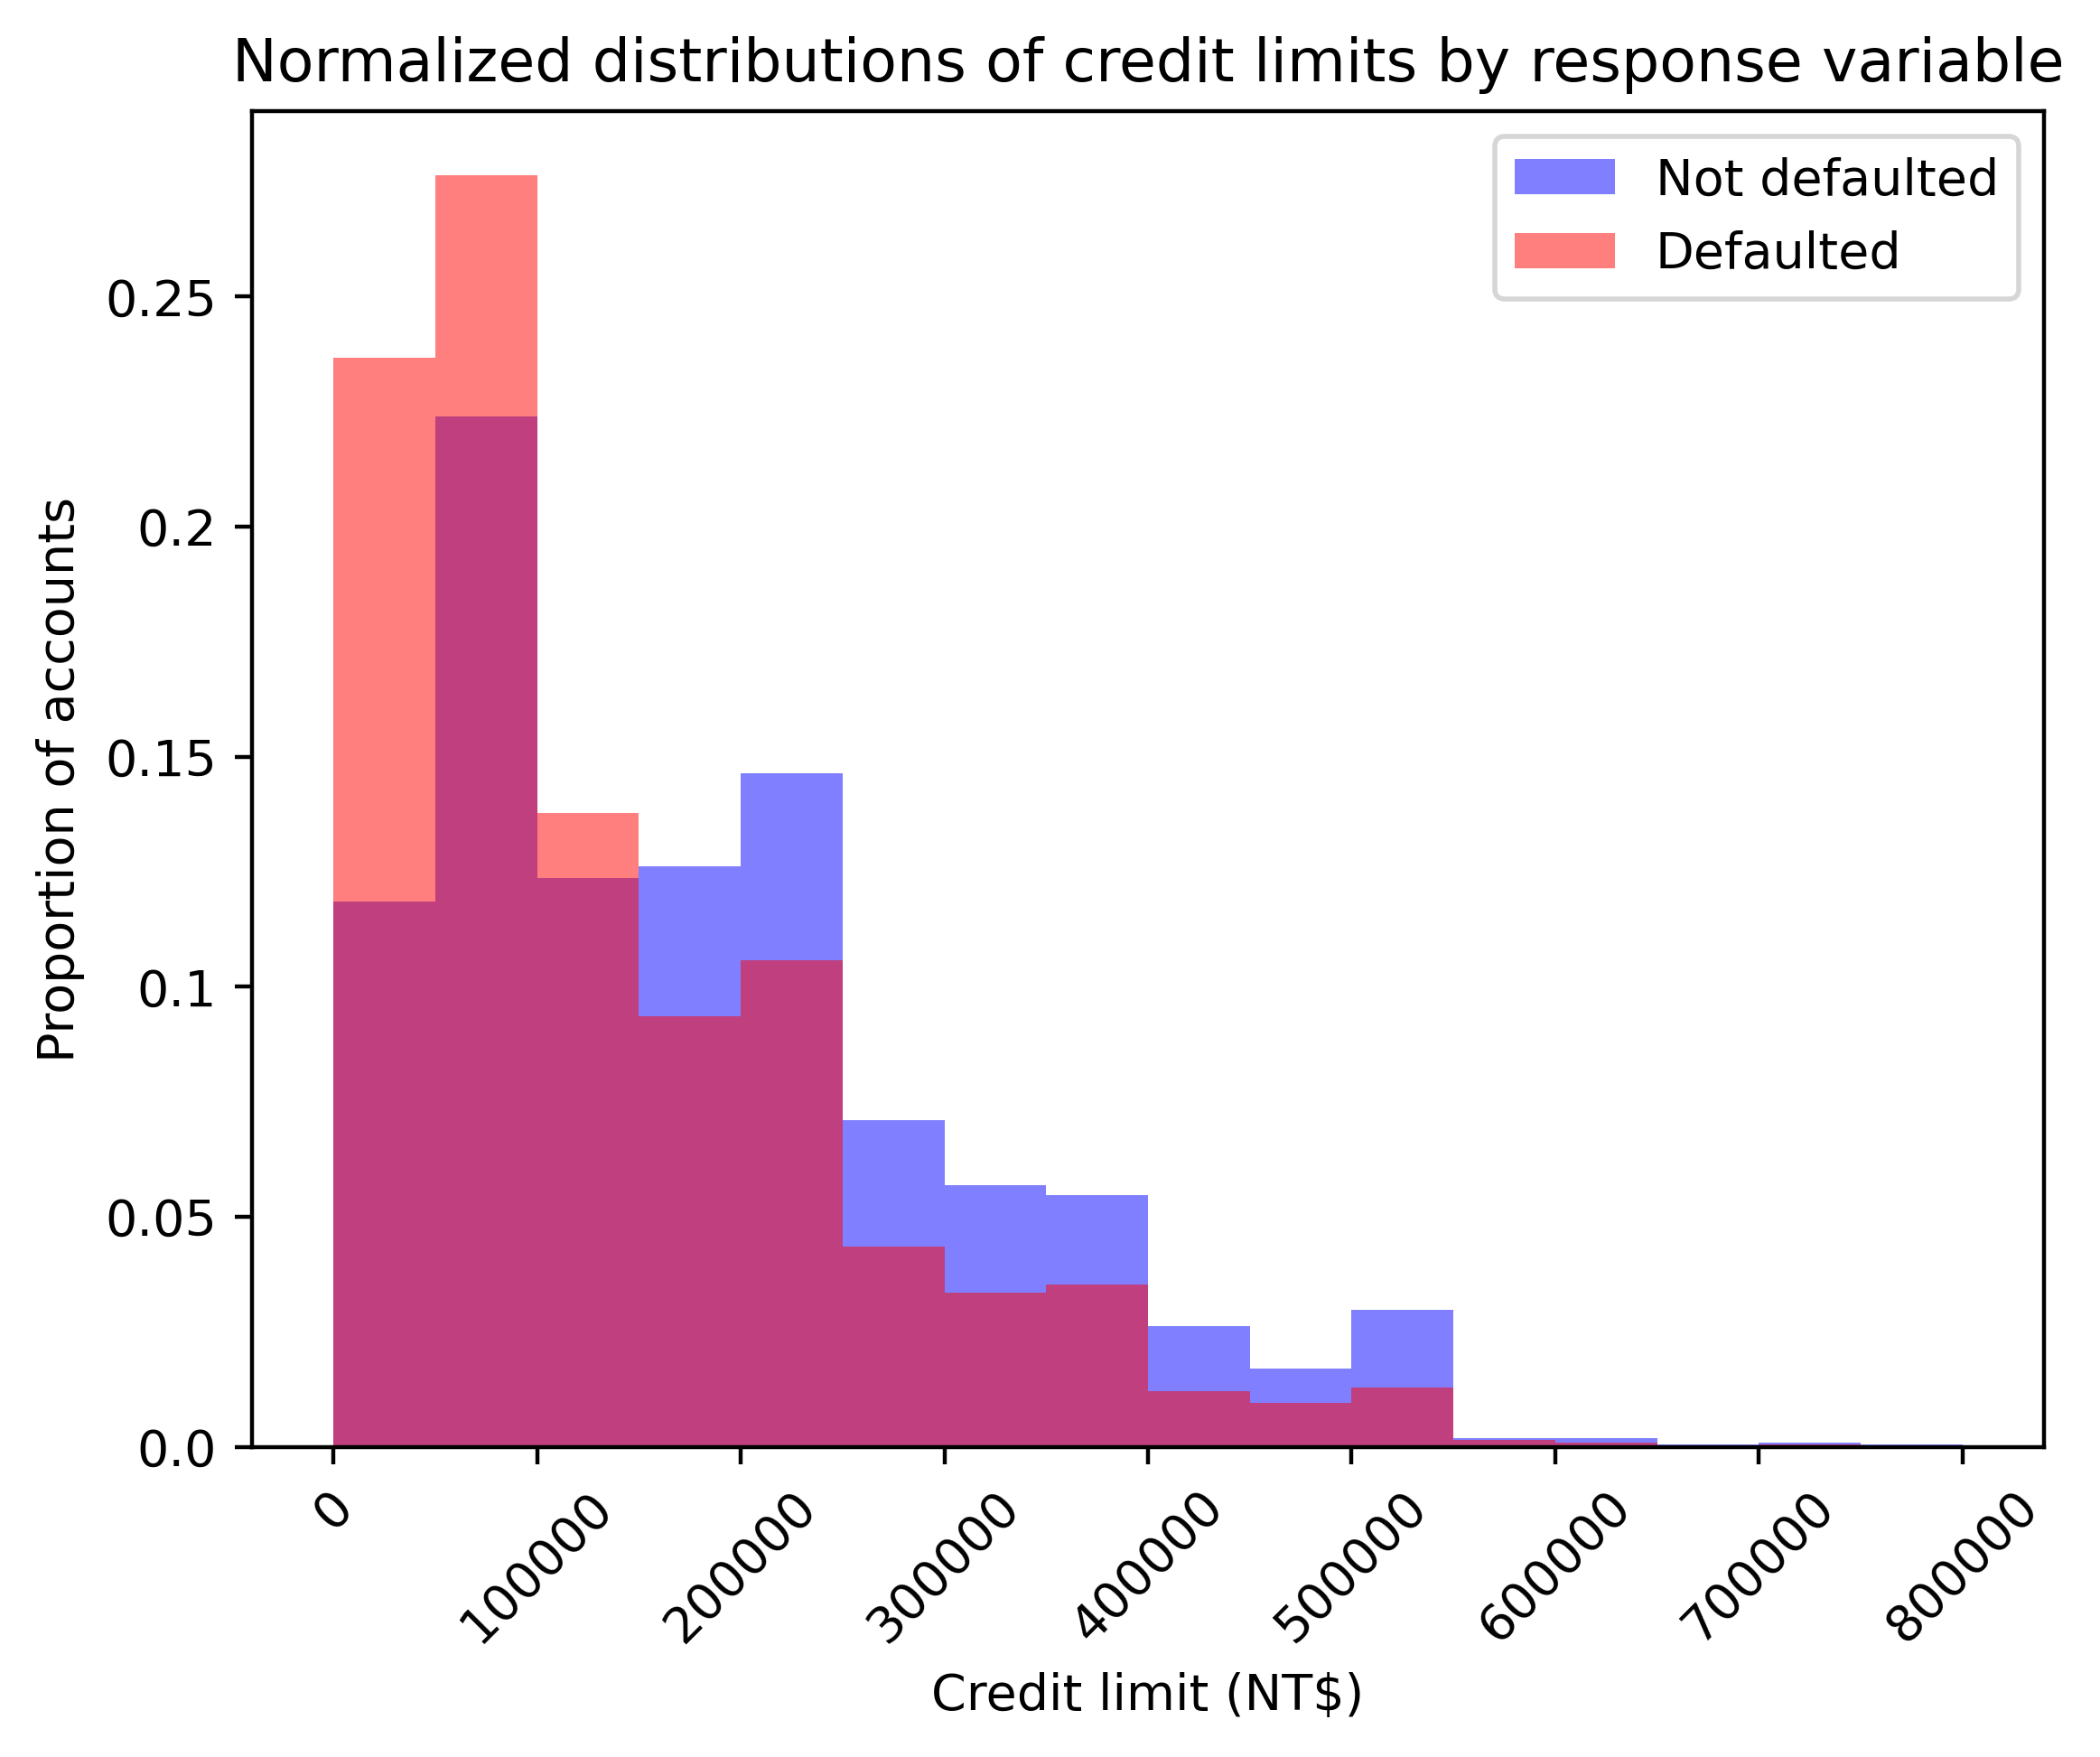

In [25]:
mpl.rcParams["figure.dpi"] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, "LIMIT_BAL"], bins=bin_edges,
          alpha=0.5, density=True, color="blue")
axes.hist(df.loc[pos_mask, "LIMIT_BAL"], bins=bin_edges,
          alpha=0.5, density=True, color="red")
axes.tick_params(axis="x", labelrotation=45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Proportion of accounts")
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000, 2))
axes.legend(["Not defaulted", "Defaulted"])
axes.set_title("Normalized distributions of credit limits by response variable")